### Problem Statement

Predict the likelihood of pet getting adopted


**Dataset credits:** Rabie El Kharoua (https://www.kaggle.com/datasets/rabieelkharoua/predict-pet-adoption-status-dataset)

**Import Necessary Libraries**

In [1]:
# Import Necessary Libraries
import pandas as pd

### Data Preparation and Exploration

In [2]:
# Step 1: Import the data from the "pet_adoption.csv" file
df = pd.read_csv("pet_adoption_data.csv")

# Step 2: Display the number of rows and columns in the dataset
print(df.shape)

# Step 3: Display the first few rows of the dataset to get an overview
df.head()

(2007, 13)


,pet_id,pet_type,breed,age_months,color,size,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [3]:
# Step 4: Drop the columns that do not add much value to the analysis
df.drop(['pet_id'], axis=1, inplace=True)
df.head()

,pet_type,breed,age_months,color,size,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood
0,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [4]:
df['adoption_likelihood'].value_counts()

adoption_likelihood
0    1348
1     659
Name: count, dtype: int64

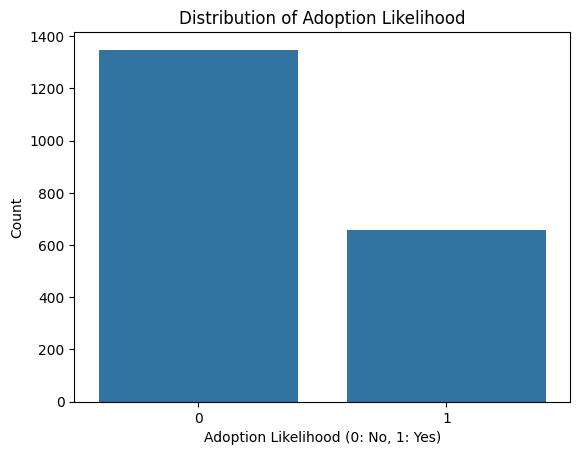

In [5]:
# Step 5: Visualize the distribution of the target variable 'adoption_likelihood' using a bar chart
import seaborn as sns
from matplotlib import pyplot as plt

sns.countplot(data=df, x='adoption_likelihood')
plt.title("Distribution of Adoption Likelihood")
plt.xlabel("Adoption Likelihood (0: No, 1: Yes)")
plt.ylabel("Count")
plt.show()

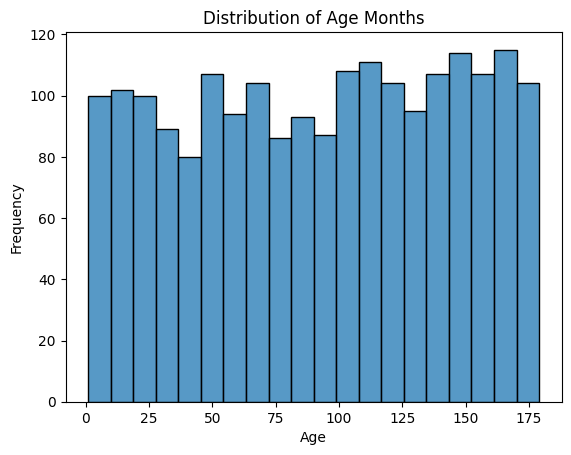

In [6]:
# Step 6: Visualize the distribution of 'age_months' using a histogram
sns.histplot(data=df, x='age_months', bins=20)
plt.title("Distribution of Age Months")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

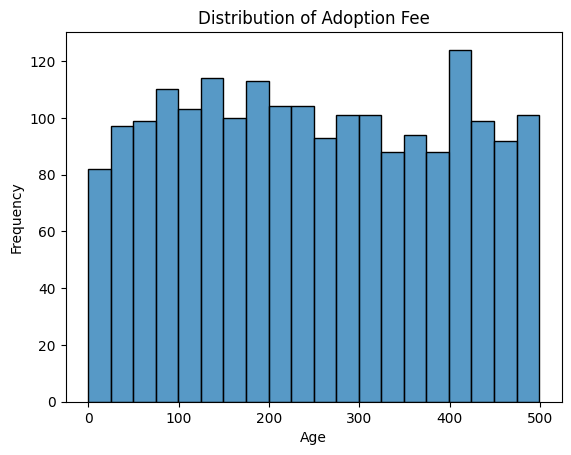

In [7]:
# Step 7: Visualize the distribution of 'adoption_fee' using a histogram
sns.histplot(data=df, x='adoption_fee', bins=20)
plt.title("Distribution of Adoption Fee")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

### Data Encoding and Scaling

In [8]:
# Step 1: Encode the categorical variables

# Encode 'size' by mapping it to numbers (e.g., Small=1, Medium=2, Large=3).
df['size'] = df['size'].map({'Small': 1, 'Medium': 2, 'Large': 3})

# Encode 'color', 'pet_type' and 'breed' using one-hot encoding
df = pd.get_dummies(df, columns=['color', 'pet_type', 'breed'], drop_first=True)

df.head()

,age_months,size,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood,color_Brown,...,color_White,pet_type_Cat,pet_type_Dog,pet_type_Rabbit,breed_Labrador,breed_Parakeet,breed_Persian,breed_Poodle,breed_Rabbit,breed_Siamese
0,131,3,5.039768,1,0,27,140,0,0,False,...,False,False,False,False,False,True,False,False,False,False
1,73,3,16.086727,0,0,8,235,0,0,False,...,True,False,False,True,False,False,False,False,True,False
2,136,2,2.076286,0,0,85,385,0,0,False,...,False,False,True,False,False,False,False,False,False,False
3,97,1,3.339423,0,0,61,217,1,0,False,...,True,False,False,False,False,True,False,False,False,False
4,123,3,20.498100,0,0,28,14,1,0,False,...,False,False,False,True,False,False,False,False,True,False


In [9]:
# Step 2: Scale the numerical features

# Scale 'weight_kg' using MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
df['weight_kg'] = scaler.fit_transform(df[['weight_kg']])

# Scale 'adoption_fee' using StandardScaler
scaler = StandardScaler()
df['adoption_fee'] = scaler.fit_transform(df[['adoption_fee']])

In [10]:
# step3: Display the first few rows of the updated dataset.

df.head()

,age_months,size,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood,color_Brown,...,color_White,pet_type_Cat,pet_type_Dog,pet_type_Rabbit,breed_Labrador,breed_Parakeet,breed_Persian,breed_Poodle,breed_Rabbit,breed_Siamese
0,131,3,0.138783,1,0,27,-0.764025,0,0,False,...,False,False,False,False,False,True,False,False,False,False
1,73,3,0.520009,0,0,8,-0.098998,0,0,False,...,True,False,False,True,False,False,False,False,True,False
2,136,2,0.036514,0,0,85,0.951044,0,0,False,...,False,False,True,False,False,False,False,False,False,False
3,97,1,0.080105,0,0,61,-0.225003,1,0,False,...,True,False,False,False,False,True,False,False,False,False
4,123,3,0.672244,0,0,28,-1.646060,1,0,False,...,False,False,False,True,False,False,False,False,True,False


### Model Training Using Decision Tree

In [11]:
# Step 1: Select the features and the target variable for modeling
X = df.drop('adoption_likelihood', axis = 1)
y = df['adoption_likelihood']

# Step 2: Split the data into training and test sets with a test size of 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Step 3: Initialize and train a Decision Tree Classifier using the training data
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Step 4: Print the model's accuracy score on the test data
print(model.score(X_test, y_test))

0.8623548922056384


In [13]:
# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model using a classification report and confusion matrix
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       403
           1       0.76      0.85      0.80       200

    accuracy                           0.86       603
   macro avg       0.84      0.86      0.85       603
weighted avg       0.87      0.86      0.86       603



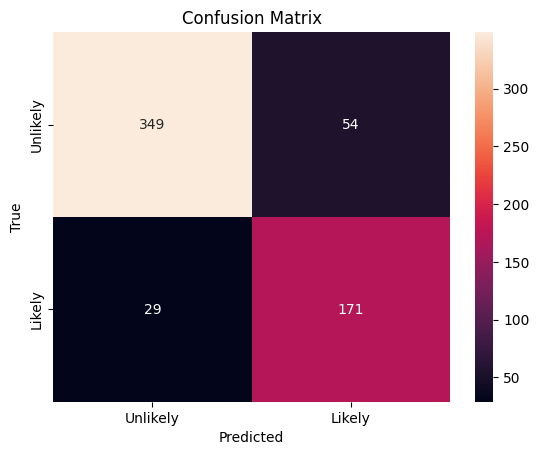

In [14]:
# Step 7: Visualize the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Unlikely', 'Likely'], yticklabels=['Unlikely', 'Likely'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### Experiment with Hyperparameters in Decision Tree

In [15]:
# Step 1: Train the Decision Tree model with specified hyperparameters
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10, min_samples_leaf=5)
model.fit(X_train, y_train)

# Step 2: Print the model's accuracy score on the test data
print(model.score(X_test, y_test))

# Step 3: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 4: Evaluate the model using a classification report and confusion matrix
report = classification_report(y_test, y_pred)
print(report)
cm = confusion_matrix(y_test, y_pred)
print(cm)

0.9054726368159204
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       403
           1       0.90      0.81      0.85       200

    accuracy                           0.91       603
   macro avg       0.90      0.88      0.89       603
weighted avg       0.91      0.91      0.90       603

[[384  19]
 [ 38 162]]


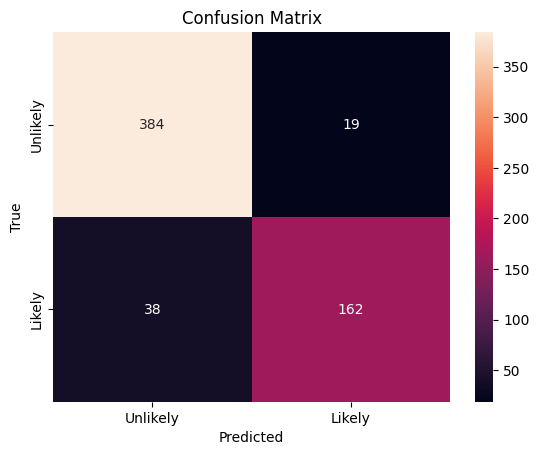

In [16]:
# Step 5: Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Unlikely', 'Likely'], yticklabels=['Unlikely', 'Likely'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [17]:
# Step 6: Visualize the decision tree
from sklearn.tree import export_text
print(export_text(model, feature_names=list(X.columns)))

|--- vaccinated <= 0.50
|   |--- age_months <= 34.50
|   |   |--- size <= 1.50
|   |   |   |--- color_White <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- color_White >  0.50
|   |   |   |   |--- class: 0
|   |   |--- size >  1.50
|   |   |   |--- size <= 2.50
|   |   |   |   |--- age_months <= 23.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- age_months >  23.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- size >  2.50
|   |   |   |   |--- adoption_fee <= -0.49
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- adoption_fee >  -0.49
|   |   |   |   |   |--- class: 0
|   |--- age_months >  34.50
|   |   |--- pet_type_Dog <= 0.50
|   |   |   |--- timein_shelter_days <= 34.50
|   |   |   |   |--- class: 0
|   |   |   |--- timein_shelter_days >  34.50
|   |   |   |   |--- color_Brown <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- color_Brown >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- pet_type_Dog >  0.50
|   |   |   |--- size <= 2.5